# First circuit

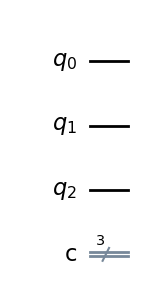

In [17]:
from qiskit import QuantumCircuit
# Create a Quantum Circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)
qc.draw(output="mpl")

# Mesure des qbits

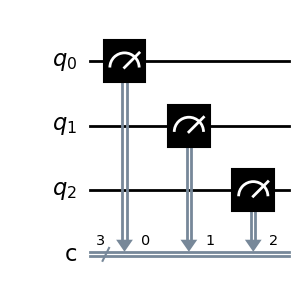

In [18]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 3)
# measure qubits 0, 1, 2 into classical bits 0, 1, 2
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw(output="mpl")

In [19]:
from qiskit.providers.aer import AerSimulator
sim = AerSimulator() # create a simulator

In [20]:
job = sim.run(qc) # run the circuit
result = job.result() # get the result
result.get_counts(qc) # get the counts

{'000': 1024}

# Encoding an input

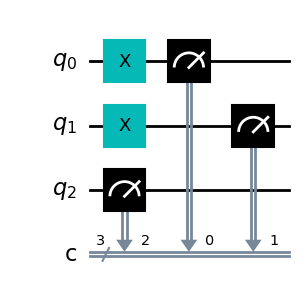

In [21]:
# Create a Quantum Circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)
qc.x([0, 1]) # apply X gate to qubits 0 and 1
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw(output="mpl") # draw the circuit

In [22]:
job = sim.run(qc) # run the circuit
result = job.result() # get the result
result.get_counts(qc) # get the counts

{'011': 1024}

## Exercice : encoder 6 ('110') et 4 ('100')

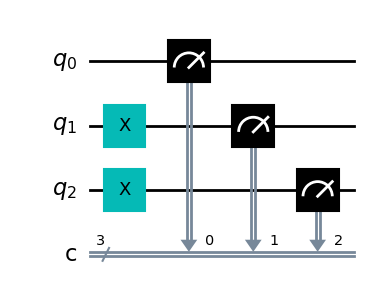

In [23]:
# Encode 6 as 110

# Create a Quantum Circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)
qc.x([1, 2]) # apply X gate to qubits 0 and 1
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw(output="mpl") # draw the circuit

In [24]:
job = sim.run(qc) # run the circuit
result = job.result() # get the result
result.get_counts(qc) # get the counts

{'110': 1024}

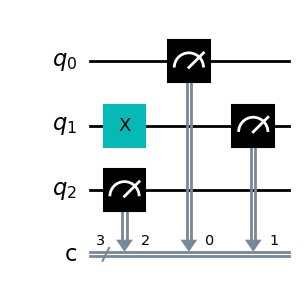

In [25]:
# Encode 6 as 110

# Create a Quantum Circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)
qc.x([1]) # apply X gate to qubits 0 and 1
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw(output="mpl") # draw the circuit

In [26]:
job = sim.run(qc) # run the circuit
result = job.result() # get the result
result.get_counts(qc) # get the counts

{'010': 1024}

# Simple adder

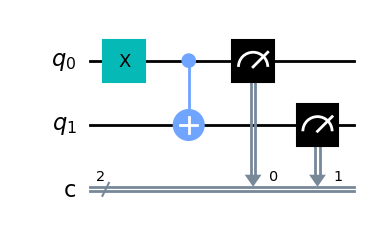

Result:  {'11': 1024}


In [27]:
# Create a Quantum Circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0, 1) # CNOT control qubit 0, target qubit 1
qc.measure([0, 1], [0, 1])
display(qc.draw(output="mpl")) # draw the circuit

job = sim.run(qc) # run the circuit
result = job.result() # get the result
# interpret the result as a counts dictionary
print("Result: ", result.get_counts())

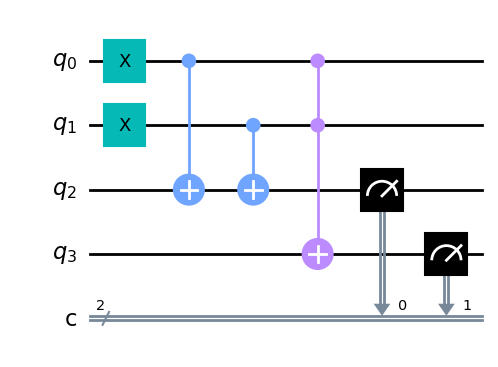

In [28]:
test_qc = QuantumCircuit(4, 2)

# First, encode an input (here '11')
test_qc.x(0)
test_qc.x(1)

# Next, carry out the adder
test_qc.cx(0, 2)
test_qc.cx(1, 2)
test_qc.ccx(0, 1, 3)

# Finally, measure bottom two qubits
test_qc.measure(2, 0)
test_qc.measure(3, 1)
test_qc.draw(output="mpl")

In [29]:
job = sim.run(test_qc) # run the circuit
result = job.result() # get the result
result.get_counts() # get the counts

{'10': 1024}

## Exercice : essayer pour toute les paires '00', '01', '10', '11'

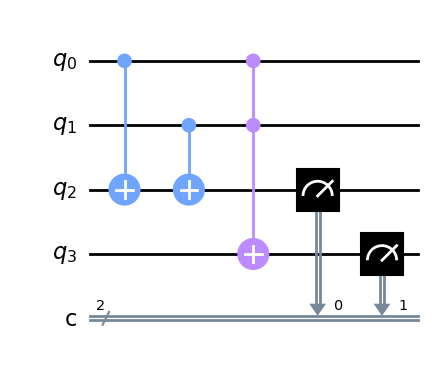

In [30]:
qc = QuantumCircuit(4, 2)

# First, encode an input (here '00')

# Next, carry out the adder
qc.cx(0, 2)
qc.cx(1, 2)
qc.ccx(0, 1, 3)

# Finally, measure bottom two qubits
qc.measure(2, 0)
qc.measure(3, 1)
qc.draw(output="mpl")

In [31]:
job = sim.run(qc) # run the circuit
result = job.result() # get the result
result.get_counts() # get the counts

{'00': 1024}

configrc.store_credentials:WARNING:2023-01-06 13:22:17,591: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-01-06 13:22:17,932: Credentials are already in use. The existing account in the session will be replaced.


Running on ibmq_lima
Job Status: job has successfully run


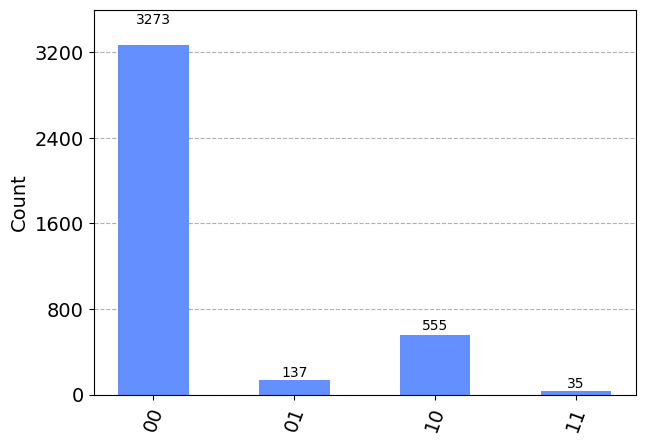

In [32]:
# 2. Ask IBM Quantum for its least busy device that isn't a simulator.
#    If you're running this example locally, you need to load your
#    account with your IBM Quantum API token
from qiskit.providers.ibmq import IBMQ, least_busy
IBMQ.save_account(token="1fe4ce1b8edb6b3beeb02b9d17f39551a5cff261a545b1ee19bef888399da4bba828527b74bcd4c2b3b670445a8748a2df010606ec942d43dadcdc3b25322234")
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
device = least_busy(
            provider.backends(
                filters= lambda x: not x.configuration().simulator
            )
        )
print(f'Running on {device.name()}')

# 3. Convert the program to a form the device can run.
#    This is known as 'transpiling'
from qiskit import transpile
transpiled_qc = transpile(qc, device)

# 4. Send the program off to IBM Quantum to run on a real device
#    and monitor its status.
from qiskit.tools import job_monitor
job = device.run(transpiled_qc)
job_monitor(job)

# 5. Plot the results as a histogram.
from qiskit.visualization import plot_histogram
plot_histogram(job.result().get_counts())

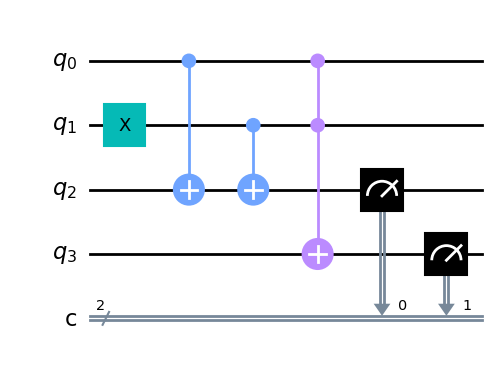

In [33]:
qc = QuantumCircuit(4, 2)

# First, encode an input (here '01')
qc.x(1)

# Next, carry out the adder
qc.cx(0, 2)
qc.cx(1, 2)
qc.ccx(0, 1, 3)

# Finally, measure bottom two qubits
qc.measure(2, 0)
qc.measure(3, 1)
qc.draw(output="mpl")

In [34]:
job = sim.run(qc) # run the circuit
result = job.result() # get the result
result.get_counts() # get the counts

{'01': 1024}

configrc.store_credentials:WARNING:2023-01-06 13:25:46,774: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-01-06 13:25:47,087: Credentials are already in use. The existing account in the session will be replaced.


Running on ibmq_lima
Job Status: job has successfully run


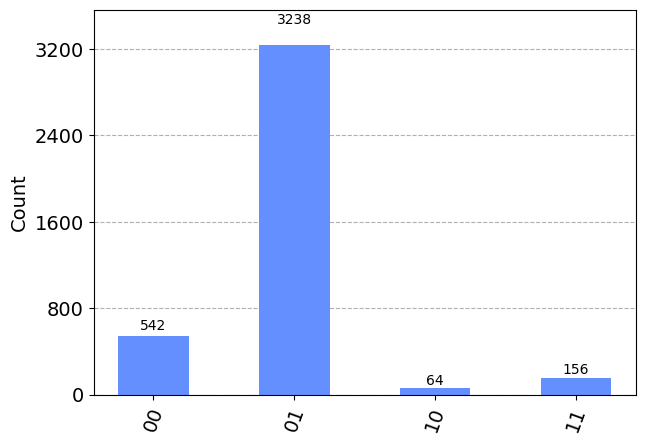

In [35]:
# 2. Ask IBM Quantum for its least busy device that isn't a simulator.
#    If you're running this example locally, you need to load your
#    account with your IBM Quantum API token
from qiskit.providers.ibmq import IBMQ, least_busy
IBMQ.save_account(token="1fe4ce1b8edb6b3beeb02b9d17f39551a5cff261a545b1ee19bef888399da4bba828527b74bcd4c2b3b670445a8748a2df010606ec942d43dadcdc3b25322234")
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
device = least_busy(
            provider.backends(
                filters= lambda x: not x.configuration().simulator
            )
        )
print(f'Running on {device.name()}')

# 3. Convert the program to a form the device can run.
#    This is known as 'transpiling'
from qiskit import transpile
transpiled_qc = transpile(qc, device)

# 4. Send the program off to IBM Quantum to run on a real device
#    and monitor its status.
from qiskit.tools import job_monitor
job = device.run(transpiled_qc)
job_monitor(job)

# 5. Plot the results as a histogram.
from qiskit.visualization import plot_histogram
plot_histogram(job.result().get_counts())

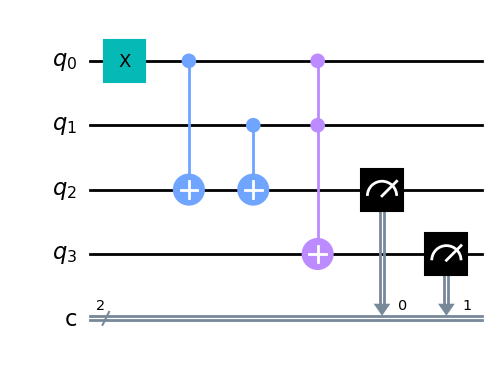

In [36]:
qc = QuantumCircuit(4, 2)

# First, encode an input (here '10')
qc.x(0)

# Next, carry out the adder
qc.cx(0, 2)
qc.cx(1, 2)
qc.ccx(0, 1, 3)

# Finally, measure bottom two qubits
qc.measure(2, 0)
qc.measure(3, 1)
qc.draw(output="mpl")

In [37]:
job = sim.run(qc) # run the circuit
result = job.result() # get the result
result.get_counts() # get the counts

{'01': 1024}

configrc.store_credentials:WARNING:2023-01-06 13:26:16,217: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-01-06 13:26:16,473: Credentials are already in use. The existing account in the session will be replaced.


Running on ibmq_lima
Job Status: job has successfully run


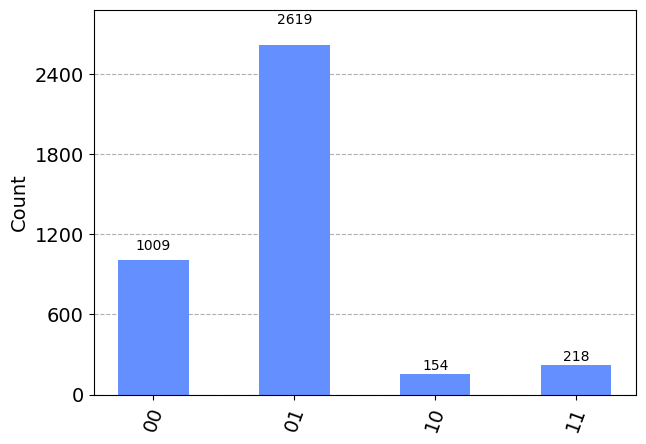

In [38]:
# 2. Ask IBM Quantum for its least busy device that isn't a simulator.
#    If you're running this example locally, you need to load your
#    account with your IBM Quantum API token
from qiskit.providers.ibmq import IBMQ, least_busy
IBMQ.save_account(token="1fe4ce1b8edb6b3beeb02b9d17f39551a5cff261a545b1ee19bef888399da4bba828527b74bcd4c2b3b670445a8748a2df010606ec942d43dadcdc3b25322234")
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
device = least_busy(
            provider.backends(
                filters= lambda x: not x.configuration().simulator
            )
        )
print(f'Running on {device.name()}')

# 3. Convert the program to a form the device can run.
#    This is known as 'transpiling'
from qiskit import transpile
transpiled_qc = transpile(qc, device)

# 4. Send the program off to IBM Quantum to run on a real device
#    and monitor its status.
from qiskit.tools import job_monitor
job = device.run(transpiled_qc)
job_monitor(job)

# 5. Plot the results as a histogram.
from qiskit.visualization import plot_histogram
plot_histogram(job.result().get_counts())

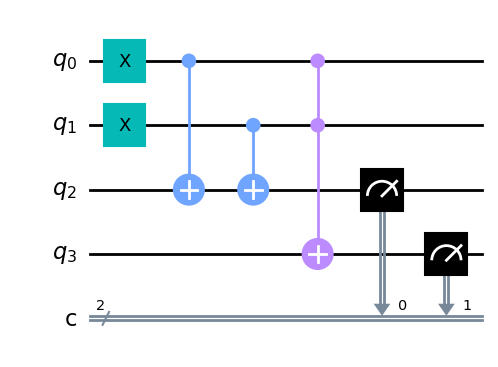

In [39]:
qc = QuantumCircuit(4, 2)

# First, encode an input (here '11')
qc.x(0)
qc.x(1)

# Next, carry out the adder
qc.cx(0, 2)
qc.cx(1, 2)
qc.ccx(0, 1, 3)

# Finally, measure bottom two qubits
qc.measure(2, 0)
qc.measure(3, 1)
qc.draw(output="mpl")

In [40]:
job = sim.run(qc) # run the circuit
result = job.result() # get the result
result.get_counts() # get the counts

{'10': 1024}

configrc.store_credentials:WARNING:2023-01-06 13:26:45,415: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-01-06 13:26:45,658: Credentials are already in use. The existing account in the session will be replaced.


Running on ibmq_lima
Job Status: job has successfully run


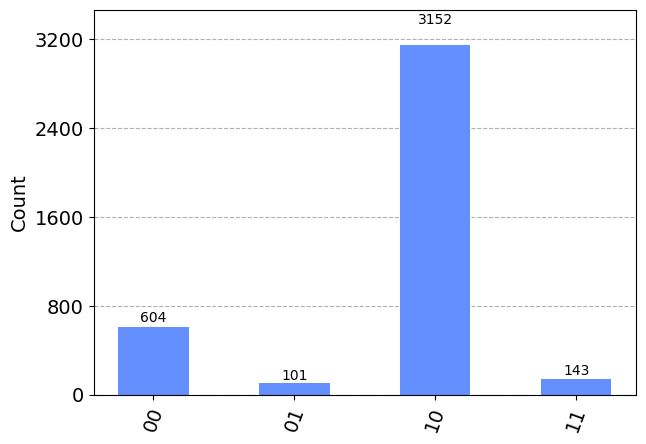

In [41]:
# 2. Ask IBM Quantum for its least busy device that isn't a simulator.
#    If you're running this example locally, you need to load your
#    account with your IBM Quantum API token
from qiskit.providers.ibmq import IBMQ, least_busy
IBMQ.save_account(token="1fe4ce1b8edb6b3beeb02b9d17f39551a5cff261a545b1ee19bef888399da4bba828527b74bcd4c2b3b670445a8748a2df010606ec942d43dadcdc3b25322234")
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
device = least_busy(
            provider.backends(
                filters= lambda x: not x.configuration().simulator
            )
        )
print(f'Running on {device.name()}')

# 3. Convert the program to a form the device can run.
#    This is known as 'transpiling'
from qiskit import transpile
transpiled_qc = transpile(qc, device)

# 4. Send the program off to IBM Quantum to run on a real device
#    and monitor its status.
from qiskit.tools import job_monitor
job = device.run(transpiled_qc)
job_monitor(job)

# 5. Plot the results as a histogram.
from qiskit.visualization import plot_histogram
plot_histogram(job.result().get_counts())